# Superconducting Qubit Refrigerator: Evaluate Coherence of Trapezoidal Cycle
This Jupyter Notebook evaluates the average coherence generated during a trapezoidal cycle with a given period.
#### Import modules

In [1]:
import sys
import os
sys.path.append(os.path.join('..','src'))
import numpy as np
import extra
import plotting
import sac_multi_envs

## Evaluate the Coherence
This cell outputs the average reward, power, negative entropy production, and coherence generated by a trapezoidal cycle with a period, expressed in units of ```dt```, given by ```period_in_timesteps```. It also outputs 4 plots: the first three are respectively the time average, as a function of the step, of the reward, power, and entropy production, and they are references to see that these average qunatities are indeed converging. The last panel shows the cycle.

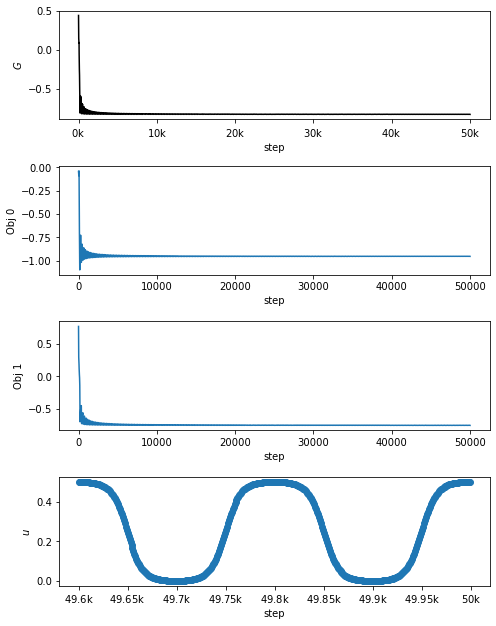

(average reward, power, negative entropy production, coherence) = [-0.8305691865704228, -0.9534393116013489, -0.7486557762012719, 0.08978994668954472]


In [3]:
period_in_timesteps = 40
a_weight = 0.4

#environment parameters
e0 = 1.
delta = 0.12
scaling_factor = 5
dt = 0.9817477042468103 / scaling_factor
env_params = {
    "g0": 1.,                             #g of bath 0
    "g1": 1.,                             #g of bath 1
    "b0": 1/0.3,                          #inverse temperature \beta of bath 0
    "b1": 1/0.15,                         #inverse temperature \beta of bath 1
    "q0": 4.,                             #quality factor of bath 0
    "q1": 4.,                             #quality factor of bath 1
    "e0": e0,                             #E_0
    "delta": delta,                       #\Delta
    "w0": 2.*e0*np.sqrt(delta**2 + 0.25), #resonance frequency of bath 0
    "w1": 2.*e0*delta,                    #resonance frequency of bath 1
    "min_u": 0.,                          #minimum value of action u
    "max_u": 0.75,                        #maximum value of action u
    "dt": dt,                             #timestep \Delta t
    "p_coeff": 1.51*10**3,                #coefficient multiplying the power
    "entropy_coeff": 27,                  #coefficient multiplying the entropy production
    "state_steps": 128                    #number of steps N representing the RL state
} 

#choose averaging values and scaling factor
gamma = 0.99999
steps = 50000

#make the policy
period_in_steps = period_in_timesteps * scaling_factor
x_vals = np.linspace(0.5,period_in_steps-0.5,period_in_steps)
a=2
y_vals = 0.25*(1. + np.tanh(a*np.cos(2.*np.pi*x_vals/period_in_steps))/np.tanh(a))

#evaluate the policy
ret = extra.test_policy(sac_multi_envs.CoherentQubitFridgePowEntropy, env_params, extra.policy_from_data(y_vals.reshape(-1,1)),
                  gamma, is_tri=False, steps=steps, a_weight=a_weight, dont_clear_output=True)
print(f"(average reward, power, negative entropy production, coherence) = {ret}")